In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
lr=LogisticRegression()

In [5]:
train_data=pd.read_excel('train_set.xlsx')

In [6]:

pd.set_option('display.max_columns',None)
train_data.head()

,Unnamed: 0,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,3112,Direct Traffic,No,1.098612,20.297783,1.098612,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,Yes,Email Opened,0
1,8413,Organic Search,No,1.791759,39.127995,1.791759,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,15,0.052632,Yes,SMS Sent,1
2,2961,Reference,No,1.386294,35.327043,0.693147,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,14,0.047619,Yes,Email Opened,1
3,24,Google,No,1.945910,33.719431,0.916291,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,14,0.052632,Yes,Email Opened,1
4,2740,Organic Search,No,1.386294,31.670175,1.386294,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.058824,No,Email Opened,0


In [7]:
test_data=pd.read_excel('test_set.xlsx')

In [8]:

pd.set_option('display.max_columns',None)
test_data.head()

,Unnamed: 0,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,567,Google,No,1.609438,18.220867,1.609438,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,14,0.062500,No,Email Opened,0
1,2303,Google,No,1.098612,39.395431,1.098612,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,14,0.052632,No,Modified,0
2,1523,Google,No,1.386294,36.660606,1.386294,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,13,0.076923,No,Email Opened,0
3,6923,Google,No,1.791759,13.674794,1.791759,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,14,0.058824,No,Email Opened,0
4,7841,Google,No,1.098612,26.495283,1.098612,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,13,0.055556,No,Email Opened,0


In [9]:
train_data.shape

(6468, 23)

In [10]:
test_data.shape

(2772, 23)

In [11]:
train_data.isnull().sum()

Unnamed: 0                                       0
Lead Source                                      0
Do Not Email                                     0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score     

In [12]:
test_data.isnull().sum()

Unnamed: 0                                       0
Lead Source                                      0
Do Not Email                                     0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score     

In [13]:
# taking only one numerical feature which came relevant

In [14]:
train_data1=train_data.drop(['Unnamed: 0','TotalVisits','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [15]:
train_data1.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,Direct Traffic,No,20.297783,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,Yes,Email Opened,0
1,Organic Search,No,39.127995,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,Yes,SMS Sent,1
2,Reference,No,35.327043,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened,1
3,Google,No,33.719431,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened,1
4,Organic Search,No,31.670175,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened,0


In [16]:
#dropping same numerical features from the test set as well

In [17]:
test_data1=test_data.drop(['Unnamed: 0','TotalVisits','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [18]:
test_data1.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,Google,No,18.220867,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened,0
1,Google,No,39.395431,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,No,Modified,0
2,Google,No,36.660606,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,No,Email Opened,0
3,Google,No,13.674794,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,No,Email Opened,0
4,Google,No,26.495283,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,No,Email Opened,0


In [19]:
train_data.shape

(6468, 23)

In [20]:
train_data1.shape

(6468, 18)

In [21]:
test_data.shape

(2772, 23)

In [22]:
test_data1.shape

(2772, 18)

In [23]:
X_train=train_data1.drop('Converted',axis=1)
y_train=train_data1['Converted']

In [24]:
X_test=test_data1.drop('Converted',axis=1)
y_test=test_data1['Converted']

In [25]:
X_train.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,Direct Traffic,No,20.297783,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,Yes,Email Opened
1,Organic Search,No,39.127995,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,Yes,SMS Sent
2,Reference,No,35.327043,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened
3,Google,No,33.719431,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened
4,Organic Search,No,31.670175,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened


In [26]:
X_test.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,Google,No,18.220867,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened
1,Google,No,39.395431,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,No,Modified
2,Google,No,36.660606,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,No,Email Opened
3,Google,No,13.674794,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,No,Email Opened
4,Google,No,26.495283,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,No,Email Opened


In [27]:
# now applying feature encoding

In [28]:
X_train['train']=1

In [29]:
X_test['train']=0

In [30]:
X_train.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,train
0,Direct Traffic,No,20.297783,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,Medium,Medium,Yes,Email Opened,1
1,Organic Search,No,39.127995,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,High,Yes,SMS Sent,1
2,Reference,No,35.327043,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened,1
3,Google,No,33.719431,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,Medium,High,Yes,Email Opened,1
4,Organic Search,No,31.670175,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened,1


In [31]:
X_test.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,train
0,Google,No,18.220867,Email Responded,India,IT Projects,Multiple Sources,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,Medium,Medium,No,Email Opened,0
1,Google,No,39.395431,Converted to Lead,India,Marketing,Other,Unemployed,Better Career Prospects,Lost to Others,Not Sure,Other Leads,Tier1,Medium,High,No,Modified,0
2,Google,No,36.660606,Email Responded,India,Tourism,unknown,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Unknown,Medium,Low,No,Email Opened,0
3,Google,No,13.674794,Email Responded,India,Finance,Online Search,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier2,Medium,Medium,No,Email Opened,0
4,Google,No,26.495283,Email Responded,India,Marketing,Social Media,Unemployed,Better Career Prospects,Response Received,Not Sure,Unknown,Tier3,Medium,High,No,Email Opened,0


In [32]:
X=pd.concat([X_train,X_test],axis=0)

In [33]:
X.shape

(9240, 18)

In [34]:
#encoding ['Asymmetrique Activity Index','Asymmetrique Profile Index']

In [35]:
X['Asymmetrique Activity Index'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [36]:
X['Asymmetrique Activity Index']=X['Asymmetrique Activity Index'].map({'Low':1,'Medium':2,'High':3})

In [37]:
X['Asymmetrique Profile Index'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [38]:
X['Asymmetrique Profile Index']=X['Asymmetrique Profile Index'].map({'Low':1,'Medium':2,'High':3})

In [39]:
X.head()

,Lead Source,Do Not Email,Total Time Spent on Website,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,train
0,Direct Traffic,No,20.297783,Email Responded,India,E-Business,unknown,Unemployed,Better Career Prospects,Status Unknown,Not Sure,Unknown,Tier1,2,2,Yes,Email Opened,1
1,Organic Search,No,39.127995,SMS Reverted,India,Marketing,unknown,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,2,3,Yes,SMS Sent,1
2,Reference,No,35.327043,Email Responded,India,HR,unknown,Student,Better Career Prospects,Closed by Horizzon,Low in Relevance,Potential Lead,Tier1,2,3,Yes,Email Opened,1
3,Google,No,33.719431,Email Responded,India,Marketing,unknown,Unemployed,Better Career Prospects,Response Received,High in Relevance,Potential Lead,Tier1,2,3,Yes,Email Opened,1
4,Organic Search,No,31.670175,Email Responded,India,Logistics,Social Media,Unemployed,Better Career Prospects,Not Reachable,Not Sure,Unknown,Tier1,2,2,No,Email Opened,1


In [40]:
#now encoding left nominal features.

In [41]:
cat_cols=list(X.select_dtypes(include=['object']).columns)

In [42]:
cat_cols

['Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [43]:
X=pd.get_dummies(X,columns=list(cat_cols),drop_first=True)

In [44]:
X

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,train,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Responded,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_Finance,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Tier3,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,20.297783,2,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,39.127995,2,3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35.327043,2,3,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33.719431,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,31.670175,2,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,16.309506,2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2768,39.812058,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2769,17.464249,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2770,0.000000,2,2,0,0,1,0,

In [45]:
X_train=X[X['train']==1]

In [46]:
X_test=X[X['train']==0]

In [47]:
X_train.head()

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,train,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Responded,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_Finance,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Tier3,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,20.297783,2,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,39.127995,2,3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35.327043,2,3,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33.719431,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,31.670175,2,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
X_test.head()

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,train,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Responded,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_Finance,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Tier3,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,18.220867,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,39.395431,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,36.660606,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,13.674794,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,26.495283,2,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.shape

(6468, 75)

In [50]:
X_test.shape

(2772, 75)

In [51]:
X.shape

(9240, 75)

In [52]:
X_train=X_train.drop('train',axis=1)

In [53]:
X_test=X_test.drop('train',axis=1)

In [54]:
X_train.shape

(6468, 74)

In [55]:
X_test.shape

(2772, 74)

In [56]:
# applying RFECV for feature selection

In [57]:
from sklearn.feature_selection import RFECV

In [58]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [59]:
from sklearn import metrics

In [60]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [61]:

rfecv=RFECV(model2,cv=10,scoring='roc_auc')
rfecv.fit(X_train,y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='roc_auc')

In [62]:
rfecv.grid_scores_

array([0.54799396, 0.56828303, 0.69402523, 0.69728136, 0.8652359 ,
       0.90702142, 0.92268887, 0.92894563, 0.93117842, 0.93378007,
       0.93504049, 0.93630296, 0.93844515, 0.93903303, 0.93950854,
       0.93925033, 0.94031878, 0.94094456, 0.94107236, 0.94171533,
       0.941865  , 0.94213963, 0.94224793, 0.94248598, 0.94239301,
       0.94247808, 0.94242064, 0.9426786 , 0.9429971 , 0.94297563,
       0.94301578, 0.94309322, 0.94327879, 0.94308853, 0.94307741,
       0.94308492, 0.94297287, 0.94304038, 0.94310659, 0.9429131 ,
       0.94286278, 0.94286987, 0.94275725, 0.94284282, 0.94281261,
       0.94294943, 0.94304744, 0.94295531, 0.94294376, 0.94295343,
       0.94305658, 0.94310549, 0.94531734, 0.94641401, 0.9487868 ,
       0.95314046, 0.95489847, 0.9547361 , 0.95681069, 0.95689275,
       0.95677634, 0.95686116, 0.9568637 , 0.95652739, 0.95676234,
       0.95686592, 0.95682817, 0.95672053, 0.95688137, 0.95685021,
       0.95663849, 0.95656999, 0.95657296, 0.95667877])

Text(0, 0.5, 'mean_roc_auc_scores')

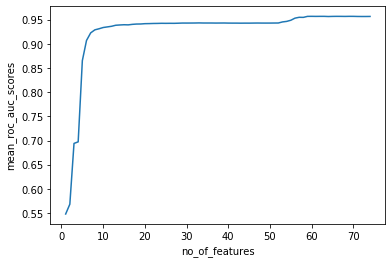

In [63]:
no_of_features=[]
mean_roc_auc_scores=[]
for i,j in enumerate(rfecv.grid_scores_,1):
    no_of_features.append(i)
    mean_roc_auc_scores.append(j)
plt.plot(no_of_features,mean_roc_auc_scores)
plt.xlabel('no_of_features')
plt.ylabel('mean_roc_auc_scores')

In [64]:
print('best no of features',rfecv.n_features_)

best no of features 60


In [65]:
rfecv.support_

array([ True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [66]:
list(X_train.columns[rfecv.support_])                        #list of best features we got

['Total Time Spent on Website',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Lead Source_Other Sources',
 'Lead Source_Reference',
 'Do Not Email_Yes',
 'Last Activity_Email Unsubscribed',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'Last Activity_SMS Reverted',
 'Country_other_country',
 'Country_unknown',
 'Specialization_HR',
 'Specialization_Healthcare',
 'Specialization_IT Projects',
 'Specialization_International Business',
 'Specialization_Logistics',
 'Specialization_Marketing',
 'Specialization_Rural and Agribusiness',
 'Specialization_Tourism',
 'Specialization_unknown',
 'How did you hear about X Education_Multiple Sources',
 'How did you hear about X Education_Online Search',
 'How did you hear about X Education_Other',
 'How did you hear about X Education_SMS',
 'How did you hear about X Education_Social Media',
 'How did you hear about X Education_Student of SomeSchool',
 'How did you hear about X Education_Word

In [67]:
X_train_selcols=X_train[list(X_train.columns[rfecv.support_])]

In [68]:
X_test_selcols=X_test[list(X_train.columns[rfecv.support_])]

In [69]:
len(X_train.columns)

74

In [70]:
len(X_train_selcols.columns)

60

In [71]:
len(X_test.columns)

74

In [72]:
len(X_test_selcols.columns)

60

In [73]:
# now applying feature scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()

In [75]:
X_train_selcols=pd.DataFrame(mmc.fit_transform(X_train_selcols),columns=X_train_selcols.columns)

In [76]:
X_test_selcols=pd.DataFrame(mmc.transform(X_test_selcols),columns=X_test_selcols.columns)

In [77]:
X_train_selcols.head()

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.427630,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.824341,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.744263,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.710395,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.667221,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_test_selcols.head()

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.383874,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.829975,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.772359,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.288098,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.558198,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [80]:
model=[]
train_accuracy_score=[]
train_roc_auc_score=[]
train_recall_score=[]
train_precision_score=[]
train_f1_score=[]


test_accuracy_score=[]
test_roc_auc_score=[]
test_recall_score=[]
test_precision_score=[]
test_f1_score=[]

In [81]:
# printing all scores on train set 

def train_scores(model1,model_name,X_train_selcols,y_train,y_train_pred,y_train_predprob):
  model.append(model_name)
  train_accuracy_score.append(model1.score(X_train_selcols,y_train))
  train_roc_auc_score.append(metrics.roc_auc_score(y_train,y_train_predprob))
  train_recall_score.append(metrics.recall_score(y_train,y_train_pred))
  train_precision_score.append(metrics.precision_score(y_train,y_train_pred))
  train_f1_score.append(metrics.f1_score(y_train,y_train_pred))

  print('accuracy score on train set=',model1.score(X_train_selcols,y_train))
  print('roc_auc_score on train set=',metrics.roc_auc_score(y_train,y_train_predprob))
  print('precision score on train set =',metrics.precision_score(y_train,y_train_pred))
  print('recall score pn train set=',metrics.recall_score(y_train,y_train_pred))
  print('f1 score on train set=',metrics.f1_score(y_train,y_train_pred))

In [82]:
def test_scores(model1,X_test_selcols,y_test,y_test_pred,y_test_predprob):

  test_accuracy_score.append(model1.score(X_test_selcols,y_test))
  test_roc_auc_score.append(metrics.roc_auc_score(y_test,y_test_predprob))
  test_recall_score.append(metrics.recall_score(y_test,y_test_pred))
  test_precision_score.append(metrics.precision_score(y_test,y_test_pred))
  test_f1_score.append(metrics.f1_score(y_test,y_test_pred))

  print('accuracy score on test set=',model1.score(X_test_selcols,y_test))
  print('roc_auc_score on test set=',metrics.roc_auc_score(y_test,y_test_predprob))
  print('precision score on test set=',metrics.precision_score(y_test,y_test_pred))
  print('recall score on test set=',metrics.recall_score(y_test,y_test_pred))
  print('f1 score on test set=',metrics.f1_score(y_test,y_test_pred))

In [83]:
def confusion_mat_train(y_train,y_train_pred):
    cm=metrics.confusion_matrix(y_train,y_train_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title('Confusion Matrix on Train set')
    plt.show()

In [84]:
def confusion_mat_test(y_test,y_test_pred):
    cm=metrics.confusion_matrix(y_test,y_test_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title('Confusion Matrix on Test set')
    plt.show()

In [85]:
def roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob):
    fpr1,tpr1,thresholds1=metrics.roc_curve(y_train,y_train_predprob)

    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_test_predprob)

    thresholds=thresholds[0]-1
    thresholds1=thresholds1[0]-1

    plt.plot(fpr1,tpr1,'y',label='train_set')


    plt.plot(fpr,tpr,'b',label='test_set')

    plt.plot(fpr,fpr,'r')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.legend()
    plt.title('ROC AUC Curve')

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score train set:',round(metrics.roc_auc_score(y_train, y_train_predprob),4)))
    plt.text(x = 0.02, y = 0.8, s = ('AUC Score test set:',round(metrics.roc_auc_score(y_test, y_test_predprob),4)))
    plt.grid(True)

## BASIC LOGISTIC REGRESSION MODEL

In [171]:
lr=LogisticRegression(solver='liblinear')

In [172]:
params={'C':np.logspace(-1,0,500)}

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
rsearch=RandomizedSearchCV(lr,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [175]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100, n_jobs=1,
                   param_distributions={'C': array([0.1       , 0.10046251, 0.10092715, 0.10139395, 0.1018629 ,
       0.10233402, 0.10280732, 0.10328281, 0.1037605 , 0.1042404 ,
       0.10472252, 0.10520687, 0.10569346, 0.10618229, 0.10667339,
       0.10716676, 0.10766242, 0.10816036, 0.10866061, 0.10916317,
       0.10966806, 0.1...
       0.85479845, 0.85875195, 0.86272373, 0.86671388, 0.87072248,
       0.87474963, 0.8787954 , 0.88285988, 0.88694317, 0.89104533,
       0.89516647, 0.89930667, 0.90346602, 0.90764461, 0.91184252,
       0.91605985, 0.92029668, 0.92455311, 0.92882923, 0.93312512,
       0.93744088, 0.9417766 , 0.94613238, 0.9505083 , 0.95490446,
       0.95932095, 0.96375787, 0.96821531, 0.97269336, 0.97719213,
       0.9817117 , 0.98625218, 0.99081366, 0.99539623, 1.        ])},
                   scoring='roc_auc')

In [176]:
rsearch.best_params_

{'C': 0.9817117022752191}

In [177]:
lr1=LogisticRegression(**rsearch.best_params_)

In [178]:
lr1.fit(X_train_selcols,y_train)

LogisticRegression(C=0.9817117022752191)

In [179]:
y_train_pred=lr1.predict(X_train_selcols)
y_train_predprob=lr1.predict_proba(X_train_selcols)[:,1]

In [180]:
y_test_pred=lr1.predict(X_test_selcols)
y_test_predprob=lr1.predict_proba(X_test_selcols)[:,1]

In [181]:
from sklearn import metrics

In [182]:
# printing all scores on train set 

train_scores(lr1,'Logistic Regression',X_train_selcols,y_train,y_train_pred,y_train_predprob)



accuracy score on train set= 0.9030612244897959
roc_auc_score on train set= 0.9601401096701163
precision score on train set = 0.8903599503516756
recall score pn train set= 0.8560063643595863
f1 score on train set= 0.8728452646522002


In [183]:
# printing all scores on test set 

test_scores(lr1,X_test_selcols,y_test,y_test_pred,y_test_predprob)


accuracy score on test set= 0.9094516594516594
roc_auc_score on test set= 0.9594277646277147
precision score on test set= 0.898
recall score on test set= 0.8576886341929322
f1 score on test set= 0.8773815339521251


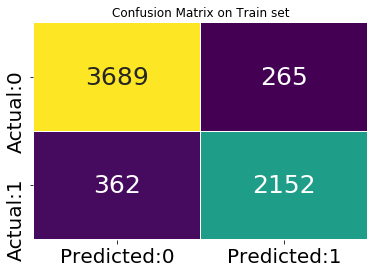

In [184]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

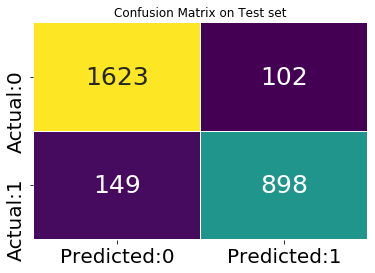

In [185]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

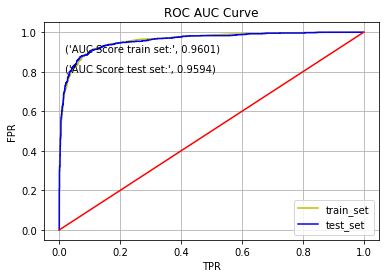

In [186]:
# roc_auc_curve on train and test set

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## RANDOM FOREST CLASSIFIER

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rfc=RandomForestClassifier(random_state=10)

In [189]:
from scipy.stats import randint as sp_randint

In [190]:
params={'n_estimators':sp_randint(80,250),'max_depth':sp_randint(2,10),'min_samples_split':sp_randint(2,30),
       'min_samples_leaf':sp_randint(1,20)}

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [193]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA70AB3088>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA70AB3688>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA70AB3648>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA70AB0EC8>},
                   scoring='roc_auc')

In [194]:
rsearch.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 26,
 'n_estimators': 129}

In [195]:
rfc1=RandomForestClassifier(random_state=10,**rsearch.best_params_)

In [196]:
rfc1.fit(X_train_selcols,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=26, n_estimators=129,
                       random_state=10)

In [197]:
y_train_pred=rfc1.predict(X_train_selcols)
y_train_predprob=rfc1.predict_proba(X_train_selcols)[:,1]

In [198]:
y_test_pred=rfc1.predict(X_test_selcols)
y_test_predprob=rfc1.predict_proba(X_test_selcols)[:,1]

In [199]:
# printing all scores on train set 

train_scores(rfc1,'Random Forest Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.9075448361162647
roc_auc_score on train set= 0.96933535378411
precision score on train set = 0.9253996447602132
recall score pn train set= 0.8289578361177407
f1 score on train set= 0.8745279060008393


In [200]:
#printing all scores on test set

test_scores(rfc1,X_test_selcols,y_test,y_test_pred,y_test_predprob)


accuracy score on test set= 0.9011544011544012
roc_auc_score on test set= 0.9647849618648173
precision score on test set= 0.9251925192519251
recall score on test set= 0.8032473734479465
f1 score on test set= 0.859918200408998


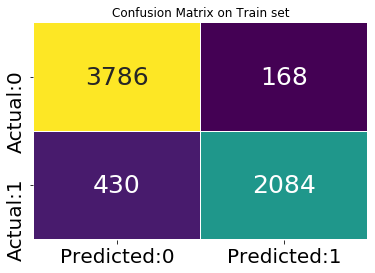

In [201]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

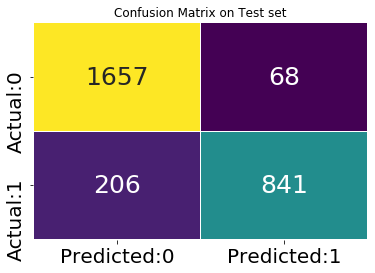

In [202]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

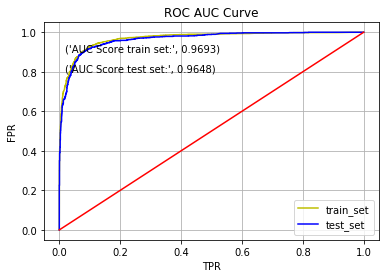

In [203]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

In [205]:
xgb=XGBClassifier(random_state=10,eval_metric='logloss',use_label_encoder=False)

In [206]:
params={'n_estimators':sp_randint(80,250),'max_depth':sp_randint(2,10),'learning_rate':np.logspace(-3,-1,100)}

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
rsearch=RandomizedSearchCV(xgb,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [209]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
       0.04132012, 0.04328761, 0.04534879, 0.0475081 , 0.04977024,
       0.05214008, 0.05462277, 0.05722368, 0.05994843, 0.06280291,
       0.06579332, 0.06892612, 0.07220809, 0.07

In [210]:
rsearch.best_params_

{'learning_rate': 0.05994842503189412, 'max_depth': 5, 'n_estimators': 182}

In [211]:
xgb1=XGBClassifier(**rsearch.best_params_,random_state=10,eval_metric='logloss',use_label_encoder=False)

In [212]:
xgb1.fit(X_train_selcols,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05994842503189412,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=182, n_jobs=8,
              num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [213]:
y_train_pred=xgb1.predict(X_train_selcols)
y_train_predprob=xgb1.predict_proba(X_train_selcols)[:,1]

In [214]:
y_test_pred=xgb1.predict(X_test_selcols)
y_test_predprob=xgb1.predict_proba(X_test_selcols)[:,1]

In [215]:
# printing all scores on train set 

train_scores(xgb1,'XGBoost Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.9318181818181818
roc_auc_score on train set= 0.9805930994825537
precision score on train set = 0.931695127030404
recall score pn train set= 0.8898170246618934
f1 score on train set= 0.9102746693794507


In [216]:
#printing all scores on test set

test_scores(xgb1,X_test_selcols,y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.922077922077922
roc_auc_score on test set= 0.9721908004927812
precision score on test set= 0.9159159159159159
recall score on test set= 0.8739255014326648
f1 score on test set= 0.8944281524926687


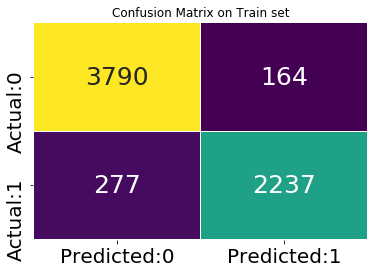

In [217]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

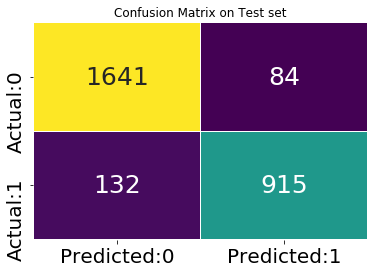

In [218]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

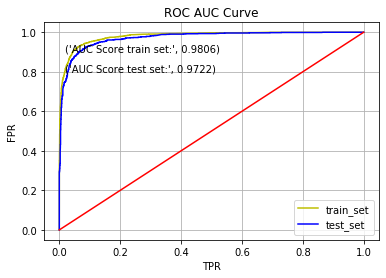

In [219]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## LIGHTGBM CLASSIFIER

In [93]:
!pip install lightgbm

Error processing line 7 of C:\Users\hp\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\hp\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [94]:
from lightgbm import LGBMClassifier

In [222]:
lgb=LGBMClassifier(random_state=10)

In [223]:
params={'n_estimators':sp_randint(80,250),'max_depth':sp_randint(2,10),'learning_rate':np.logspace(-3,-1,100)
        }

In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
rsearch=RandomizedSearchCV(lgb,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [226]:
rsearch.fit(X_train_selcols,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=10), n_iter=100,
                   n_jobs=1,
                   param_distributions={'learning_rate': array([0.001     , 0.00104762, 0.0010975 , 0.00114976, 0.0012045 ,
       0.00126186, 0.00132194, 0.00138489, 0.00145083, 0.00151991,
       0.00159228, 0.0016681 , 0.00174753, 0.00183074, 0.00191791,
       0.00200923, 0.0021049 , 0.00220513, 0.00231013, 0.00242013,
       0.002535...
       0.04132012, 0.04328761, 0.04534879, 0.0475081 , 0.04977024,
       0.05214008, 0.05462277, 0.05722368, 0.05994843, 0.06280291,
       0.06579332, 0.06892612, 0.07220809, 0.07564633, 0.07924829,
       0.08302176, 0.0869749 , 0.09111628, 0.09545485, 0.1       ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA7238FCC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA7238FB88>},
              

In [227]:
rsearch.best_params_

{'learning_rate': 0.09545484566618342, 'max_depth': 4, 'n_estimators': 196}

In [228]:
lgb1=LGBMClassifier(random_state=10,**rsearch.best_params_)

In [229]:
lgb1.fit(X_train_selcols,y_train)

LGBMClassifier(learning_rate=0.09545484566618342, max_depth=4, n_estimators=196,
               random_state=10)

In [230]:
y_train_pred=lgb1.predict(X_train_selcols)
y_train_predprob=lgb1.predict_proba(X_train_selcols)[:,1]

y_test_pred=lgb1.predict(X_test_selcols)
y_test_predprob=lgb1.predict_proba(X_test_selcols)[:,1]

In [231]:
# printing all scores on train set 

train_scores(lgb1,'LightGBM Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.9359925788497218
roc_auc_score on train set= 0.9824485662284127
precision score on train set = 0.9331683168316832
recall score pn train set= 0.8997613365155132
f1 score on train set= 0.9161603888213853


In [232]:
#printing all scores on test set

test_scores(lgb1,X_test_selcols,y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.9217171717171717
roc_auc_score on test set= 0.9729598715446479
precision score on test set= 0.9125248508946322
recall score on test set= 0.8767908309455588
f1 score on test set= 0.8943010228933268


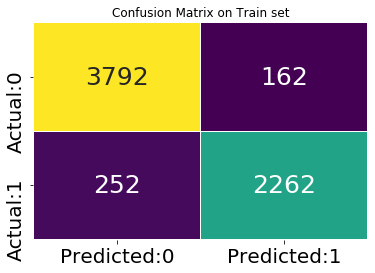

In [233]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

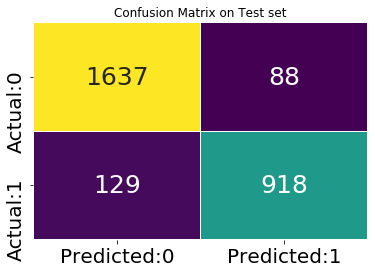

In [234]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

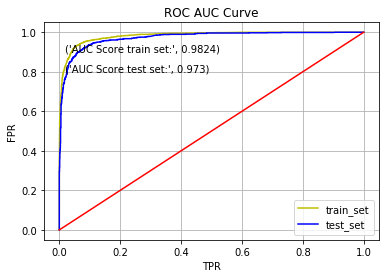

In [235]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## Naive Bayes Classifier

In [236]:
from sklearn.naive_bayes import BernoulliNB

In [237]:
bnb=BernoulliNB()

In [238]:
bnb.fit(X_train_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1),y_train)

BernoulliNB()

In [239]:
y_test_pred=bnb.predict(X_test_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1))
y_test_predprob=bnb.predict_proba(X_test_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1))[:,1]



In [240]:
y_train_pred=bnb.predict(X_train_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1))
y_train_predprob=bnb.predict_proba(X_train_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1))[:,1]



In [241]:
# printing all scores on train set 

train_scores(bnb,'Naive Bayes Classifier',X_train_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1),y_train,y_train_pred,y_train_predprob)




accuracy score on train set= 0.8206555349412492
roc_auc_score on train set= 0.8952625036769307
precision score on train set = 0.8223809523809524
recall score pn train set= 0.6869530628480509
f1 score on train set= 0.7485912440398786


In [242]:
# printing all scores on test set 

test_scores(bnb,X_test_selcols.drop(['Total Time Spent on Website','Asymmetrique Activity Index','Asymmetrique Profile Index'],axis=1),y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.8221500721500722
roc_auc_score on test set= 0.9005464889331838
precision score on test set= 0.8321342925659473
recall score on test set= 0.6628462273161414
f1 score on test set= 0.7379053694843168


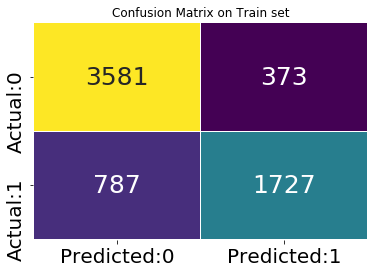

In [243]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

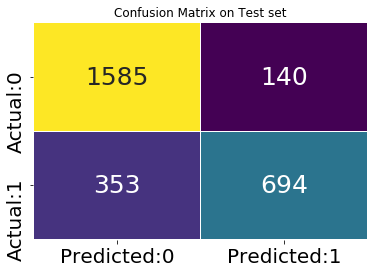

In [244]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

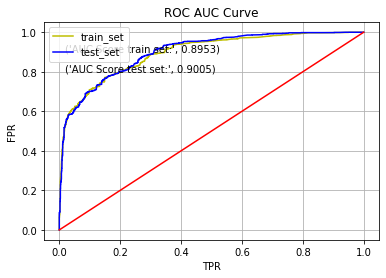

In [245]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## KNN Classifier

In [246]:
X_train_selcols.head()

,Total Time Spent on Website,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Last Activity_Email Unsubscribed,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Reverted,Country_other_country,Country_unknown,Specialization_HR,Specialization_Healthcare,Specialization_IT Projects,Specialization_International Business,Specialization_Logistics,Specialization_Marketing,Specialization_Rural and Agribusiness,Specialization_Tourism,Specialization_unknown,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_unknown,What is your current occupation_Others,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,Tags_Graduation in progress,Tags_Lost to Others,Tags_Not Eligible,Tags_Not Reachable,Tags_Response Received,Tags_Status Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,City_Tier2,City_Unknown,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.427630,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.824341,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.744263,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.710395,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.667221,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
from sklearn.neighbors import KNeighborsClassifier

In [248]:
knn=KNeighborsClassifier(  )            

In [249]:
params={'n_neighbors':np.arange(1,50),'p':[0,1,2],'weights':['uniform','distance']
        }

In [250]:
from sklearn.model_selection import RandomizedSearchCV

In [251]:
rsearch=RandomizedSearchCV(knn,param_distributions=params,cv=10,scoring='roc_auc',n_iter=150,n_jobs=1)

In [252]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=150,
                   n_jobs=1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': [0, 1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')

In [253]:
rsearch.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 49}

In [254]:
knn1=KNeighborsClassifier( **rsearch.best_params_ )            

In [255]:
knn1.fit(X_train_selcols,y_train)

KNeighborsClassifier(n_neighbors=49, p=1, weights='distance')

In [256]:
y_train_pred=knn1.predict(X_train_selcols)
y_train_predprob=knn1.predict_proba(X_train_selcols)[:,1]

In [257]:
y_test_pred=knn1.predict(X_test_selcols)
y_test_predprob=knn1.predict_proba(X_test_selcols)[:,1]

In [258]:
# printing all scores on train set 

train_scores(knn1,'KNN Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)

accuracy score on train set= 0.9925788497217068
roc_auc_score on train set= 0.9994831674036624
precision score on train set = 0.9896743447180302
recall score pn train set= 0.9912490055688147
f1 score on train set= 0.9904610492845788


In [259]:

# printing all scores on test set

test_scores(knn1,X_test_selcols,y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.8957431457431457
roc_auc_score on test set= 0.9532918068186537
precision score on test set= 0.8947916666666667
recall score on test set= 0.8204393505253104
f1 score on test set= 0.8560039860488291


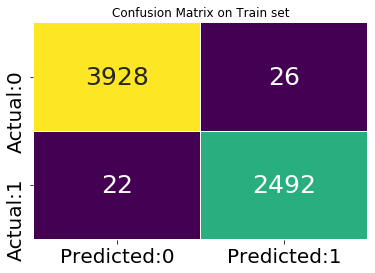

In [260]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

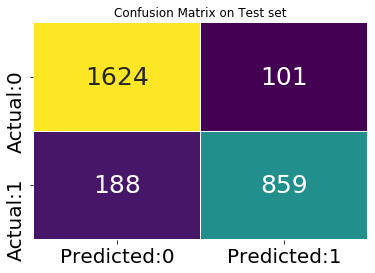

In [261]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

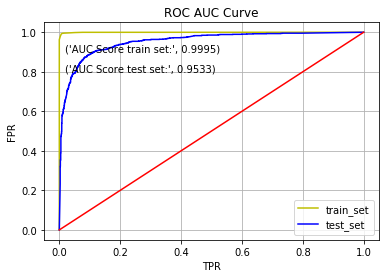

In [262]:
# printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 

## GradientBoosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [264]:
gbc=GradientBoostingClassifier(random_state=10)

In [265]:
params={'n_estimators':sp_randint(80,250),'max_depth':sp_randint(2,10),'learning_rate':np.logspace(-3,-1,100),'max_features':sp_randint(5,10)}

In [266]:
from sklearn.model_selection import RandomizedSearchCV

In [267]:
rsearch=RandomizedSearchCV(gbc,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [268]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=10),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': array([0.001     , 0.00104762, 0.0010975 , 0.00114976, 0.0012045 ,
       0.00126186, 0.00132194, 0.00138489, 0.00145083, 0.00151991,
       0.00159228, 0.0016681 , 0.00174753, 0.00183074, 0.00191791,
       0.00200923, 0.0021049 , 0.00220513, 0.00231013, 0.00242...
       0.06579332, 0.06892612, 0.07220809, 0.07564633, 0.07924829,
       0.08302176, 0.0869749 , 0.09111628, 0.09545485, 0.1       ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA72302508>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA724CF148>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA723023C8>},
                   scori

In [269]:
rsearch.best_params_

{'learning_rate': 0.09545484566618342,
 'max_depth': 5,
 'max_features': 6,
 'n_estimators': 228}

In [270]:
gbc1=GradientBoostingClassifier(random_state=10,**rsearch.best_params_)

In [271]:
gbc1.fit(X_train_selcols,y_train)

GradientBoostingClassifier(learning_rate=0.09545484566618342, max_depth=5,
                           max_features=6, n_estimators=228, random_state=10)

In [272]:
y_train_pred=gbc1.predict(X_train_selcols)
y_train_predprob=gbc1.predict_proba(X_train_selcols)[:,1]

In [273]:
y_test_pred=gbc1.predict(X_test_selcols)
y_test_predprob=gbc1.predict_proba(X_test_selcols)[:,1]

In [274]:
from sklearn import metrics

In [275]:
# printing all scores on train set 

train_scores(gbc1,'GradientBoosting Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)

accuracy score on train set= 0.9435683364254793
roc_auc_score on train set= 0.9855141505998377
precision score on train set = 0.9430927835051547
recall score pn train set= 0.9097056483691328
f1 score on train set= 0.9260984004859284


In [276]:

# printing all scores on test set

test_scores(gbc1,X_test_selcols,y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.9231601731601732
roc_auc_score on test set= 0.9723699181927661
precision score on test set= 0.9120553359683794
recall score on test set= 0.8815663801337154
f1 score on test set= 0.8965517241379309


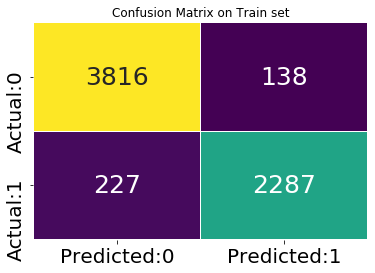

In [277]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

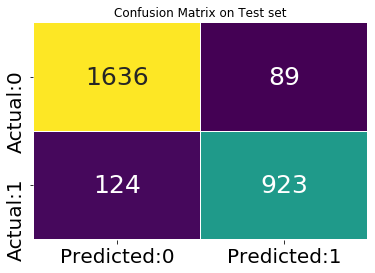

In [278]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

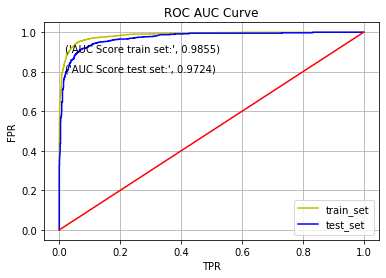

In [279]:
# printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 

## Adaboost Classifier

In [280]:
from sklearn.ensemble import AdaBoostClassifier

In [281]:
ada=AdaBoostClassifier(random_state=10)

In [282]:
params={'n_estimators':sp_randint(80,250),'learning_rate':np.logspace(-3,-1,100)}

In [283]:
from sklearn.model_selection import RandomizedSearchCV

In [284]:
rsearch=RandomizedSearchCV(ada,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [285]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=10),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': array([0.001     , 0.00104762, 0.0010975 , 0.00114976, 0.0012045 ,
       0.00126186, 0.00132194, 0.00138489, 0.00145083, 0.00151991,
       0.00159228, 0.0016681 , 0.00174753, 0.00183074, 0.00191791,
       0.00200923, 0.0021049 , 0.00220513, 0.00231013, 0.00242013,
       0.00...
       0.03274549, 0.03430469, 0.03593814, 0.03764936, 0.03944206,
       0.04132012, 0.04328761, 0.04534879, 0.0475081 , 0.04977024,
       0.05214008, 0.05462277, 0.05722368, 0.05994843, 0.06280291,
       0.06579332, 0.06892612, 0.07220809, 0.07564633, 0.07924829,
       0.08302176, 0.0869749 , 0.09111628, 0.09545485, 0.1       ]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA70B67608>},
                   scoring='roc_auc')

In [286]:
rsearch.best_params_

{'learning_rate': 0.07564633275546291, 'n_estimators': 219}

In [287]:
ada1=AdaBoostClassifier(random_state=10,**rsearch.best_params_)

In [288]:
ada1.fit(X_train_selcols,y_train)

AdaBoostClassifier(learning_rate=0.07564633275546291, n_estimators=219,
                   random_state=10)

In [289]:
y_train_pred=ada1.predict(X_train_selcols)
y_train_predprob=ada1.predict_proba(X_train_selcols)[:,1]

In [290]:
y_test_pred=ada1.predict(X_test_selcols)
y_test_predprob=ada1.predict_proba(X_test_selcols)[:,1]

In [291]:
from sklearn import metrics

In [292]:
# printing all scores on train set 

train_scores(ada1,'AdaBoost Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.8903834260977118
roc_auc_score on train set= 0.9556428361318247
precision score on train set = 0.8908618449545258
recall score pn train set= 0.8182179793158313
f1 score on train set= 0.8529960605432303


In [293]:

# printing all scores on test set

test_scores(ada1,X_test_selcols,y_test,y_test_pred,y_test_predprob)

accuracy score on test set= 0.8903318903318903
roc_auc_score on test set= 0.9530290824024473
precision score on test set= 0.8947927736450585
recall score on test set= 0.8042024832855779
f1 score on test set= 0.8470824949698189


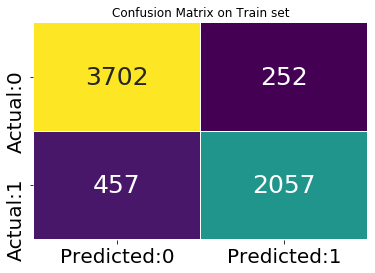

In [294]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

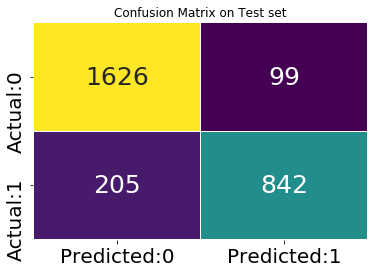

In [295]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

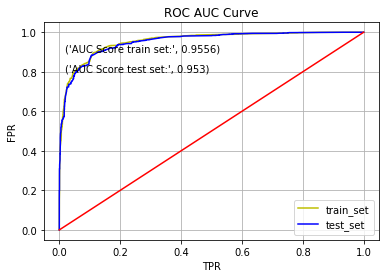

In [296]:
# printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 

## Decision Tree Calssifier

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
dt=DecisionTreeClassifier(random_state=10)

In [299]:
from scipy.stats import randint as sp_randint

In [300]:
params={'max_depth':sp_randint(2,10),'min_samples_split':sp_randint(2,50),
       'min_samples_leaf':sp_randint(1,50)}

In [301]:
from sklearn.model_selection import RandomizedSearchCV

In [302]:
rsearch=RandomizedSearchCV(dt,param_distributions=params,cv=10,scoring='roc_auc',n_iter=100,n_jobs=1)

In [303]:
rsearch.fit(X_train_selcols,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA726F3608>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA72714B08>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DA7270F648>},
                   scoring='roc_auc')

In [304]:
rsearch.best_params_

{'max_depth': 9, 'min_samples_leaf': 16, 'min_samples_split': 40}

In [305]:
dt1=DecisionTreeClassifier(random_state=10,**rsearch.best_params_)

In [306]:
dt1.fit(X_train_selcols,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=16, min_samples_split=40,
                       random_state=10)

In [307]:
y_train_pred=dt1.predict(X_train_selcols)
y_train_predprob=dt1.predict_proba(X_train_selcols)[:,1]

In [308]:
y_test_pred=dt1.predict(X_test_selcols)
y_test_predprob=dt1.predict_proba(X_test_selcols)[:,1]

In [309]:
# printing all scores on train set 

train_scores(dt1,'DecisionTree Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.9111008039579468
roc_auc_score on train set= 0.9632995538590369
precision score on train set = 0.9075241698192518
recall score pn train set= 0.8587907716785999
f1 score on train set= 0.8824851829143674


In [310]:
#printing all scores on test set

test_scores(dt1,X_test_selcols,y_test,y_test_pred,y_test_predprob)


accuracy score on test set= 0.9040404040404041
roc_auc_score on test set= 0.9487493597995652
precision score on test set= 0.8980632008154944
recall score on test set= 0.8414517669531996
f1 score on test set= 0.8688362919132151


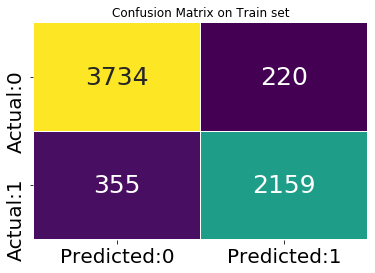

In [311]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

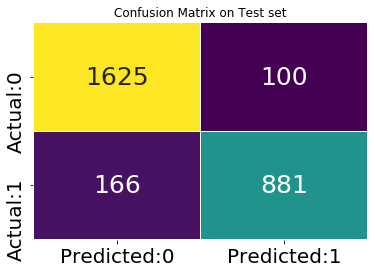

In [312]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

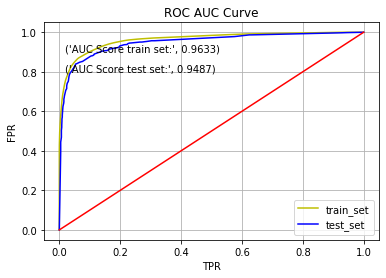

In [313]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


## Printing Scores of all models in a DataFrame

In [314]:
df_scores=pd.DataFrame({'model':model,
              'train_accuracy_score':train_accuracy_score,'test_accuracy_score':test_accuracy_score,
              'train_roc_auc_score':train_roc_auc_score,'test_roc_auc_score':test_roc_auc_score,
              'train_precision_score':train_precision_score,'test_precision_score':test_precision_score,
              'train_recall_scorel':train_recall_score,'test_recall_scorel':test_recall_score,
              'train_f1_score':train_f1_score,'test_f1_score':test_f1_score})

df_scores

,model,train_accuracy_score,test_accuracy_score,train_roc_auc_score,test_roc_auc_score,train_precision_score,test_precision_score,train_recall_scorel,test_recall_scorel,train_f1_score,test_f1_score
0,Logistic Regression,0.903061,0.909452,0.960140,0.959428,0.890360,0.898000,0.856006,0.857689,0.872845,0.877382
1,Random Forest Classifier,0.907545,0.901154,0.969335,0.964785,0.925400,0.925193,0.828958,0.803247,0.874528,0.859918
2,XGBoost Classifier,0.931818,0.922078,0.980593,0.972191,0.931695,0.915916,0.889817,0.873926,0.910275,0.894428
3,LightGBM Classifier,0.935993,0.921717,0.982449,0.972960,0.933168,0.912525,0.899761,0.876791,0.916160,0.894301
4,Naive Bayes Classifier,0.820656,0.822150,0.895263,0.900546,0.822381,0.832134,0.686953,0.662846,0.748591,0.737905
5,KNN Classifier,0.992579,0.895743,0.999483,0.953292,0.989674,0.894792,0.991249,0.820439,0.990461,0.856004
6,GradientBoosting Classifier,0.943568,0.923160,0.985514,0.972370,0.943093,0.912055,0.909706,0.881566,0.926098,0.896552
7,AdaBoost Classifier,0.890383,0.890332,0.955643,0.953029,0.890862,0.894793,0.818218,0.804202,0.852996,0.847082
8,DecisionTree Classifier,0.911101,0.904040,0.963300,0.948749,0.907524,0.898063,0.858791,0.841452,0.882485,0.868836


In [316]:
df_scores.sort_values(by='test_f1_score',ascending=False)

,model,train_accuracy_score,test_accuracy_score,train_roc_auc_score,test_roc_auc_score,train_precision_score,test_precision_score,train_recall_scorel,test_recall_scorel,train_f1_score,test_f1_score
6,GradientBoosting Classifier,0.943568,0.923160,0.985514,0.972370,0.943093,0.912055,0.909706,0.881566,0.926098,0.896552
2,XGBoost Classifier,0.931818,0.922078,0.980593,0.972191,0.931695,0.915916,0.889817,0.873926,0.910275,0.894428
3,LightGBM Classifier,0.935993,0.921717,0.982449,0.972960,0.933168,0.912525,0.899761,0.876791,0.916160,0.894301
0,Logistic Regression,0.903061,0.909452,0.960140,0.959428,0.890360,0.898000,0.856006,0.857689,0.872845,0.877382
8,DecisionTree Classifier,0.911101,0.904040,0.963300,0.948749,0.907524,0.898063,0.858791,0.841452,0.882485,0.868836
1,Random Forest Classifier,0.907545,0.901154,0.969335,0.964785,0.925400,0.925193,0.828958,0.803247,0.874528,0.859918
5,KNN Classifier,0.992579,0.895743,0.999483,0.953292,0.989674,0.894792,0.991249,0.820439,0.990461,0.856004
7,AdaBoost Classifier,0.890383,0.890332,0.955643,0.953029,0.890862,0.894793,0.818218,0.804202,0.852996,0.847082
4,Naive Bayes Classifier,0.820656,0.822150,0.895263,0.900546,0.822381,0.832134,0.686953,0.662846,0.748591,0.737905


In [435]:
df_scores.sort_values(by='test_accuracy_score',ascending=False)

,model,train_accuracy_score,test_accuracy_score,train_roc_auc_score,test_roc_auc_score,train_precision_score,test_precision_score,train_recall_scorel,test_recall_scorel,train_f1_score,test_f1_score
6,GradientBoosting Classifier,0.943568,0.923160,0.985514,0.972370,0.943093,0.912055,0.909706,0.881566,0.926098,0.896552
2,XGBoost Classifier,0.931818,0.922078,0.980593,0.972191,0.931695,0.915916,0.889817,0.873926,0.910275,0.894428
3,LightGBM Classifier,0.935993,0.921717,0.982449,0.972960,0.933168,0.912525,0.899761,0.876791,0.916160,0.894301
0,Logistic Regression,0.903061,0.909452,0.960140,0.959428,0.890360,0.898000,0.856006,0.857689,0.872845,0.877382
8,DecisionTree Classifier,0.911101,0.904040,0.963300,0.948749,0.907524,0.898063,0.858791,0.841452,0.882485,0.868836
1,Random Forest Classifier,0.907545,0.901154,0.969335,0.964785,0.925400,0.925193,0.828958,0.803247,0.874528,0.859918
5,KNN Classifier,0.992579,0.895743,0.999483,0.953292,0.989674,0.894792,0.991249,0.820439,0.990461,0.856004
7,AdaBoost Classifier,0.890383,0.890332,0.955643,0.953029,0.890862,0.894793,0.818218,0.804202,0.852996,0.847082
4,Naive Bayes Classifier,0.820656,0.822150,0.895263,0.900546,0.822381,0.832134,0.686953,0.662846,0.748591,0.737905


## Applying VotingClassier

In [86]:
from sklearn.ensemble import VotingClassifier

In [97]:
#['GradientBoosting Classifier','XGBoost Classifier','LightGBM Classifier']

gbc1=GradientBoostingClassifier(random_state=10,learning_rate= 0.09545484566618342,
 max_depth= 5,
 max_features= 6,
 n_estimators= 228)

lgb1=LGBMClassifier(random_state=10,learning_rate= 0.09545484566618342,max_depth= 4, n_estimators=196)

xgb1=XGBClassifier(learning_rate= 0.05994842503189412, max_depth= 5, n_estimators=182,random_state=10,eval_metric='logloss',use_label_encoder=False)


In [98]:
# applying voting classifier with voting='soft'

In [99]:
vcl=VotingClassifier(estimators=[('gbc1',gbc1),('lgb1',lgb1),('xgb1',xgb1)],voting='soft',weights=[3,2,1])


In [100]:
vcl.fit(X_train_selcols,y_train)


VotingClassifier(estimators=[('gbc1',
                              GradientBoostingClassifier(learning_rate=0.09545484566618342,
                                                         max_depth=5,
                                                         max_features=6,
                                                         n_estimators=228,
                                                         random_state=10)),
                             ('lgb1',
                              LGBMClassifier(learning_rate=0.09545484566618342,
                                             max_depth=4, n_estimators=196,
                                             random_state=10)),
                             ('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_by...
                                            learning_rate=0.05994842503189412

In [101]:
y_train_pred=vcl.predict(X_train_selcols)
y_train_predprob=vcl.predict_proba(X_train_selcols)[:,1]

In [102]:
y_test_pred=vcl.predict(X_test_selcols)
y_test_predprob=vcl.predict_proba(X_test_selcols)[:,1]

In [103]:
# printing all scores on train set 

train_scores(vcl,'Voting Classifier',X_train_selcols,y_train,y_train_pred,y_train_predprob)


accuracy score on train set= 0.9412492269635127
roc_auc_score on train set= 0.9844520659018652
precision score on train set = 0.9427385892116182
recall score pn train set= 0.903739061256961
f1 score on train set= 0.9228269699431356


In [104]:
#printing all scores on test set

test_scores(vcl,X_test_selcols,y_test,y_test_pred,y_test_predprob)


accuracy score on test set= 0.9235209235209235
roc_auc_score on test set= 0.9731852220976427
precision score on test set= 0.9162512462612163
recall score on test set= 0.87774594078319
f1 score on test set= 0.8965853658536586


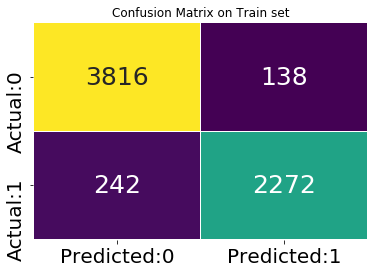

In [105]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

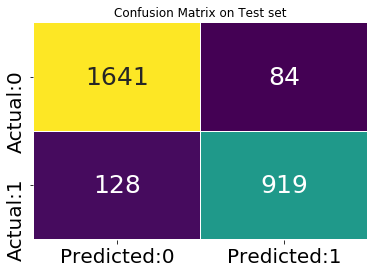

In [106]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

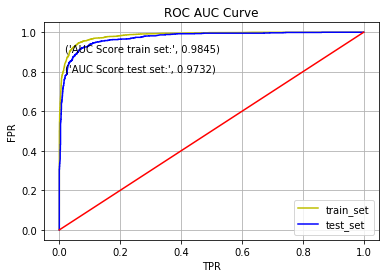

In [107]:
#printing roc_auc_curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob) 


In [355]:
#applying voting classifier with voting='hard'

In [329]:
vcl=VotingClassifier(estimators=[('gbc1',gbc1),('lgb1',lgb1),('xgb1',xgb1)],voting='hard')


In [330]:
vcl.fit(X_train_selcols,y_train)


VotingClassifier(estimators=[('gbc1',
                              GradientBoostingClassifier(learning_rate=0.09545484566618342,
                                                         max_depth=5,
                                                         max_features=6,
                                                         n_estimators=228,
                                                         random_state=10)),
                             ('lgb1',
                              LGBMClassifier(learning_rate=0.09545484566618342,
                                             max_depth=4, n_estimators=196,
                                             random_state=10)),
                             ('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_by...
                                            interaction_constraints=None,
   

In [331]:
y_train_pred=vcl.predict(X_train_selcols)
#y_train_predprob=vcl.predict_proba(X_train_selcols)[:,1]

In [332]:
y_test_pred=vcl.predict(X_test_selcols)
#y_test_predprob=vcl.predict_proba(X_test_selcols)[:,1]

In [333]:
# printing f1 score on train set 

metrics.f1_score(y_train,y_train_pred)

0.9170394469296463

In [334]:
#printing f1 score on test set

metrics.f1_score(y_test,y_test_pred)


0.8937621832358674

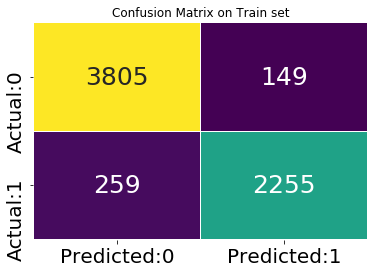

In [335]:
#printing confusion matrix on train set

confusion_mat_train(y_train,y_train_pred)

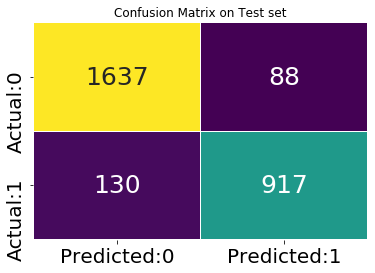

In [336]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

## Seeing Feature importance scores on the basis of best performing model

In [108]:
gbc1=GradientBoostingClassifier(random_state=10,learning_rate= 0.09545484566618342,
 max_depth= 5,
 max_features= 6,
 n_estimators= 228)

In [109]:
gbc1.fit(X_train_selcols,y_train)

GradientBoostingClassifier(learning_rate=0.09545484566618342, max_depth=5,
                           max_features=6, n_estimators=228, random_state=10)

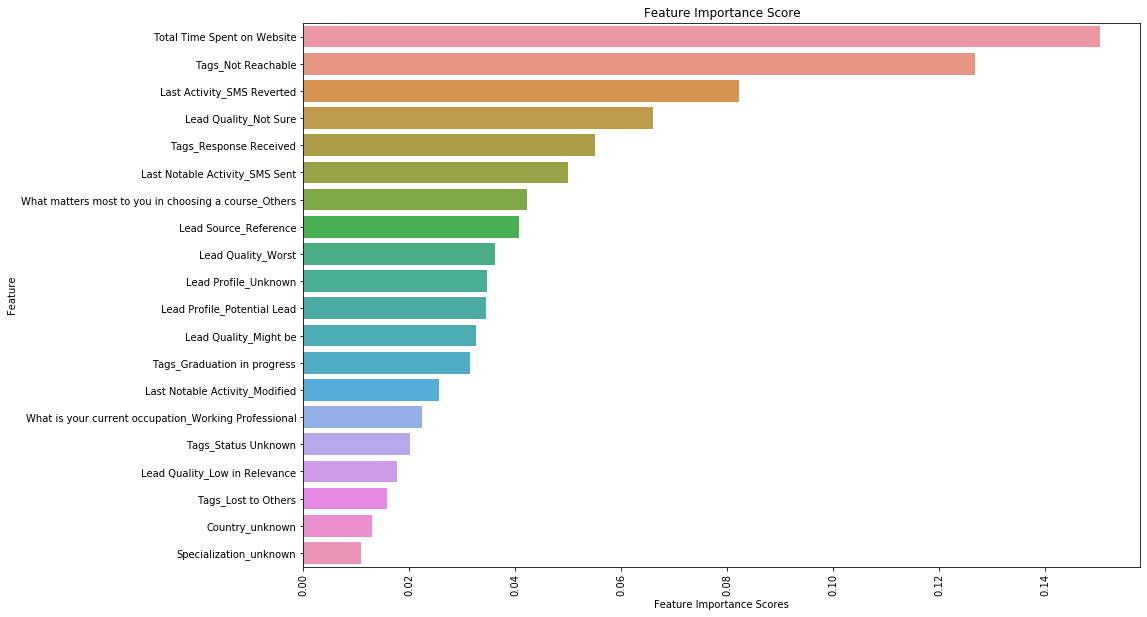

In [116]:
plt.figure(figsize=(15,10))

feature_imp_scores=pd.Series(gbc1.feature_importances_,index=X_train_selcols.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_scores[:20],y=feature_imp_scores[:20].index,orient='h')
plt.xticks(rotation=90)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.savefig('Feature Importance Score.png',dpi=300)

## Checking Accuracy score, F1 score with Gradient Boosting Classifier at different counts of Most Important Features

In [117]:
# Taking the best performing model in our case

gbc1=GradientBoostingClassifier(random_state=10,learning_rate= 0.09545484566618342,
 max_depth= 5,
 max_features= 6,
 n_estimators= 228)

In [118]:
feature_imp_scores

Total Time Spent on Website                                 0.150425
Tags_Not Reachable                                          0.126795
Last Activity_SMS Reverted                                  0.082125
Lead Quality_Not Sure                                       0.065970
Tags_Response Received                                      0.055081
Last Notable Activity_SMS Sent                              0.049988
What matters most to you in choosing a course_Others        0.042144
Lead Source_Reference                                       0.040635
Lead Quality_Worst                                          0.036188
Lead Profile_Unknown                                        0.034689
Lead Profile_Potential Lead                                 0.034555
Lead Quality_Might be                                       0.032540
Tags_Graduation in progress                                 0.031407
Last Notable Activity_Modified                              0.025663
What is your current occupation_Wo

In [119]:
top_features_count=[]
train_acc_score=[]
test_acc_score=[]

train_f_score=[]
test_f_score=[]


for i in range(6,61,1):

    
    top=list(feature_imp_scores[0:i].index)

    gbc1.fit(X_train_selcols[top],y_train)
    
    y_train_pred=gbc1.predict(X_train_selcols[top])
    y_test_pred=gbc1.predict(X_test_selcols[top])
    
    train_acc_score.append(metrics.accuracy_score(y_train,y_train_pred))
    test_acc_score.append(metrics.accuracy_score(y_test,y_test_pred))

    train_f_score.append(metrics.f1_score(y_train,y_train_pred))
    test_f_score.append(metrics.f1_score(y_test,y_test_pred))

    top_features_count.append(i)

In [120]:
scores_with_top_features=pd.DataFrame({'top_features_count':top_features_count,
                                            'train_accuracy_score':train_acc_score,'test_accuracy_score':test_acc_score,
                                            'train_f1_score':train_f_score,'test_f1_score':test_f_score})



In [121]:
scores_with_top_features.sort_values(by='test_f1_score',ascending=False).head(10)

,top_features_count,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score
34,40,0.948052,0.928211,0.932094,0.903539
36,42,0.949598,0.927128,0.934115,0.902415
38,44,0.946815,0.927489,0.930561,0.902190
33,39,0.948825,0.927128,0.933037,0.902037
29,35,0.946815,0.926768,0.930589,0.901885
35,41,0.947124,0.926768,0.930909,0.901885
37,43,0.947897,0.926768,0.932043,0.901790
32,38,0.947124,0.926768,0.930993,0.901600
49,55,0.945578,0.926407,0.928687,0.900875
43,49,0.946970,0.926407,0.930581,0.900682


In [122]:
scores_with_top_features.sort_values(by='test_accuracy_score',ascending=False).head(1)

,top_features_count,train_accuracy_score,test_accuracy_score,train_f1_score,test_f1_score
34,40,0.948052,0.928211,0.932094,0.903539


### from above result we can see that with top 40 features we are able to get highest accuracy and f1 score.

In [123]:
top=list(feature_imp_scores[0:40].index)

In [124]:
gbc1.fit(X_train_selcols[top],y_train)


GradientBoostingClassifier(learning_rate=0.09545484566618342, max_depth=5,
                           max_features=6, n_estimators=228, random_state=10)

In [125]:
y_train_pred=gbc1.predict(X_train_selcols[top])
y_test_pred=gbc1.predict(X_test_selcols[top])




In [126]:
y_train_predprob=gbc1.predict_proba(X_train_selcols[top])[:,1]
y_test_predprob=gbc1.predict_proba(X_test_selcols[top])[:,1]


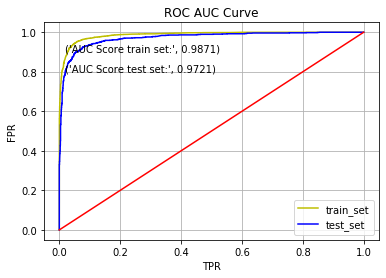

In [127]:
# printing roc auc curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob)

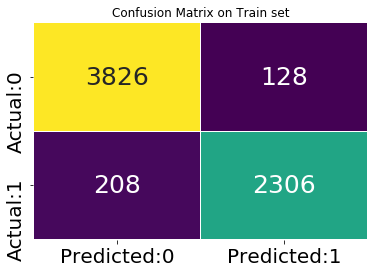

In [129]:
# printing confusion matrix for train error

confusion_mat_train(y_train,y_train_pred)

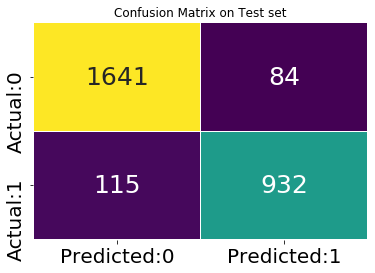

In [131]:
#printing confusion matrix on test set

confusion_mat_test(y_test,y_test_pred)

In [350]:
pd.concat([X_train_selcols,y_train],axis=1).to_excel('train_set_with_selcols.xlsx') 


In [351]:
pd.concat([X_test_selcols,y_test],axis=1).to_excel('test_set_with_selcols.xlsx') 


In [192]:
#Building Logistic Regression model on the top of 40 important features

In [194]:
len(top)

40

In [195]:
lr5=LogisticRegression(C= 0.9817117022752191,solver='liblinear')

lr5.fit(X_train_selcols[top],y_train)


LogisticRegression(C=0.9817117022752191, solver='liblinear')

In [196]:
y_train_pred=lr5.predict(X_train_selcols[top])
y_test_pred=lr5.predict(X_test_selcols[top])




In [197]:
y_train_predprob=lr5.predict_proba(X_train_selcols[top])[:,1]
y_test_predprob=lr5.predict_proba(X_test_selcols[top])[:,1]


In [199]:
#printing f1 score on train set

metrics.f1_score(y_train,y_train_pred)

0.8721165520032375

In [200]:
#printing f1 score on test set

metrics.f1_score(y_test,y_test_pred)

0.8743276283618582

In [201]:
#printing accuracy score on train set

metrics.accuracy_score(y_train,y_train_pred)

0.9022881880024737

In [202]:
#printing accuracy score on test set

metrics.accuracy_score(y_test,y_test_pred)

0.9072871572871573

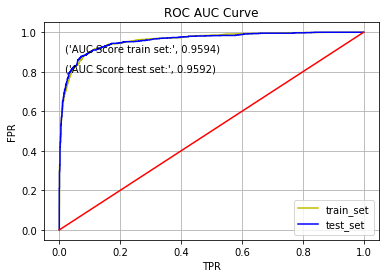

In [198]:
# printing roc auc curve

roc_auc_curve1(y_train,y_train_predprob,y_test,y_test_predprob)

In [ ]:
# seeing conversion rate with top 5 most important features

In [134]:
df25=pd.concat([X_train_selcols,y_train],axis=1)

In [174]:
ser25=df25.groupby('Tags_Not Reachable')['Converted'].mean()*100
ser25

Tags_Not Reachable
0.0    46.304098
1.0     7.704655
Name: Converted, dtype: float64

In [176]:
ser25.index=['Reachable','Not Reachable']

Text(0.55, 43, "('Not Reachable', 7.7)")

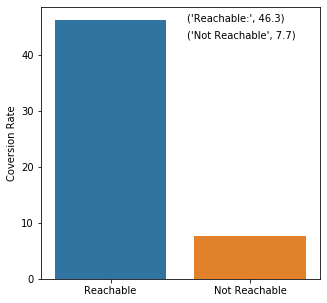

In [177]:
plt.figure(figsize=(5,5))

sns.barplot(x=ser25.index,y=ser25.values)

plt.ylabel('Coversion Rate')
plt.text(x = 0.55, y = 46, s = ('Reachable:',round(ser25[0],2)))
plt.text(x = 0.55, y = 43, s = ('Not Reachable',round(ser25[1],2)))


In [178]:
ser26=df25.groupby('Last Activity_SMS Reverted')['Converted'].mean()*100
ser26
ser26.index=['Not Reverted','Reverted']
ser26

Not Reverted    28.457975
Reverted        63.255814
Name: Converted, dtype: float64

Text(0, 0.5, 'Coversion Rate')

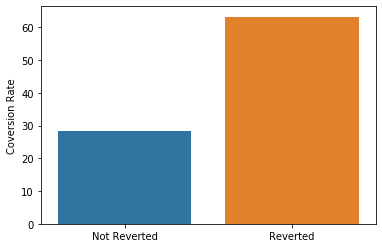

In [180]:
sns.barplot(x=ser26.index,y=ser26.values)
plt.ylabel('Coversion Rate')

plt.ylabel('Coversion Rate')


In [186]:
ser27=df25.groupby('Lead Quality_Not Sure')['Converted'].mean()*100
ser27
ser27.index=['Sure','Not Sure']
ser27

Sure        67.852658
Not Sure    21.892621
Name: Converted, dtype: float64

Text(0, 0.5, 'Coversion Rate')

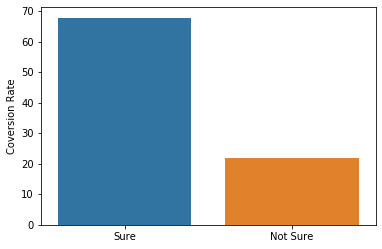

In [185]:
sns.barplot(x=ser27.index,y=ser27.values)
plt.ylabel('Coversion Rate')

In [190]:
ser28=df25.groupby('Tags_Response Received')['Converted'].mean()*100
ser28
ser28.index=['Not Received','Received']
ser28

Not Received    23.518891
Received        73.283208
Name: Converted, dtype: float64

Text(0, 0.5, 'Coversion Rate')

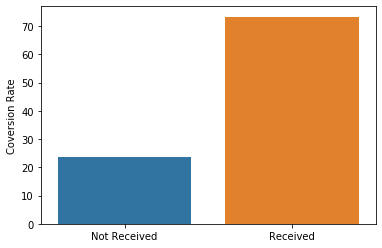

In [188]:
sns.barplot(x=ser28.index,y=ser28.values)
plt.ylabel('Coversion Rate')

In [191]:
ser29=df25.groupby('Converted')['Total Time Spent on Website'].mean()*100
ser29
ser29.index=['Not Converted','Converted']
ser29

Not Converted    29.458841
Converted        46.584245
Name: Total Time Spent on Website, dtype: float64

Text(0, 0.5, 'Mean Time spent on Website')

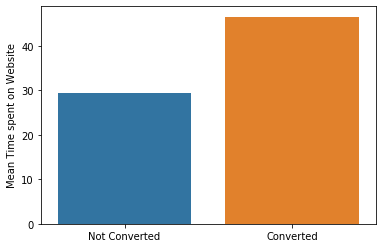

In [183]:
sns.barplot(x=ser29.index,y=ser29.values)
plt.ylabel('Mean Time spent on Website')